         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375
Model with X1, learning rate 0.1: theta_0 = 5.9279, theta_1 = -2.0383
Model with X1, learning rate 0.05: theta_0 = 5.9279, theta_1 = -2.0383
Model with X1, learning rate 0.01: theta_0 = 5.8592, theta_1 = -2.0116
Model with X2, learning rate 0.1: theta_0 = 0.7361, theta_1 = 0.5576
Model with X2, learning rate 0.05: theta_0 = 0.7361, theta_1 = 0.5576
Model with X2, learning rate 0.01: theta_0 = 0.7308, theta_1 = 0.5597
Model with X3, learning rate 0.1: theta_0 = 2.8714, theta_1 = -0.5205
Model with X3, learning rate 0.05: theta_0 = 2.8714, theta_1 = -0.5205
Model with X3, learning rate 0.01: theta_0 = 2.8421, theta_1 = -0.5089
The explanatory variable X1 with learning rate 0.01 has the lowest cost: 0.9856
Variable: X1, Learning Rate: 0.01, 

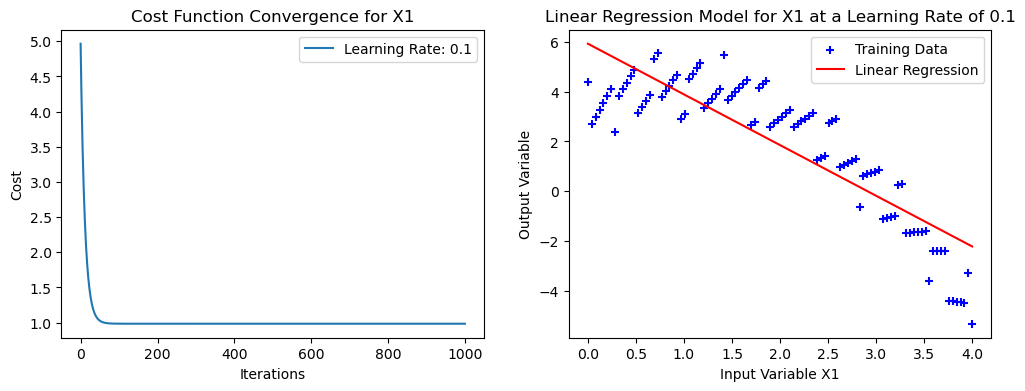

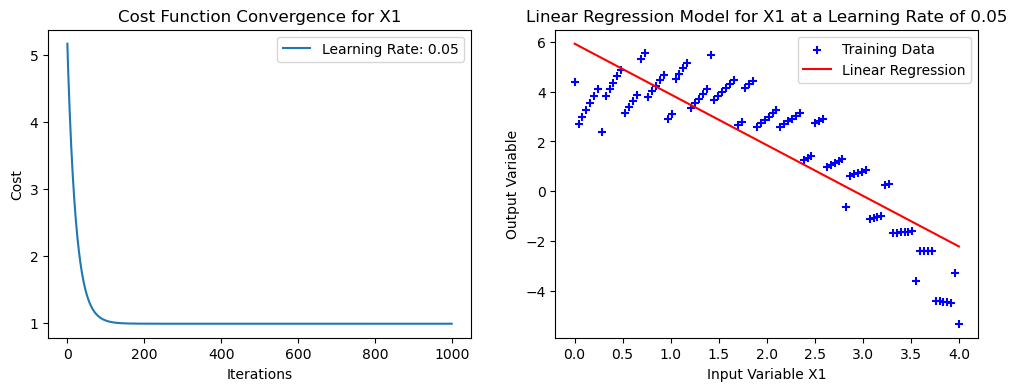

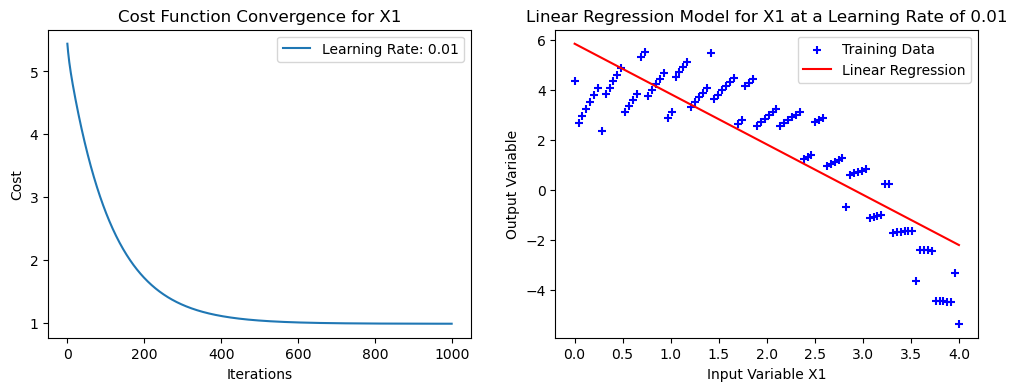

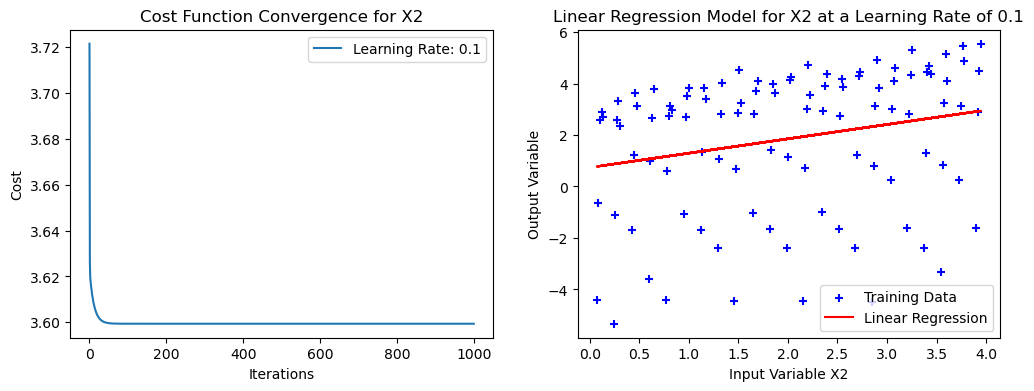

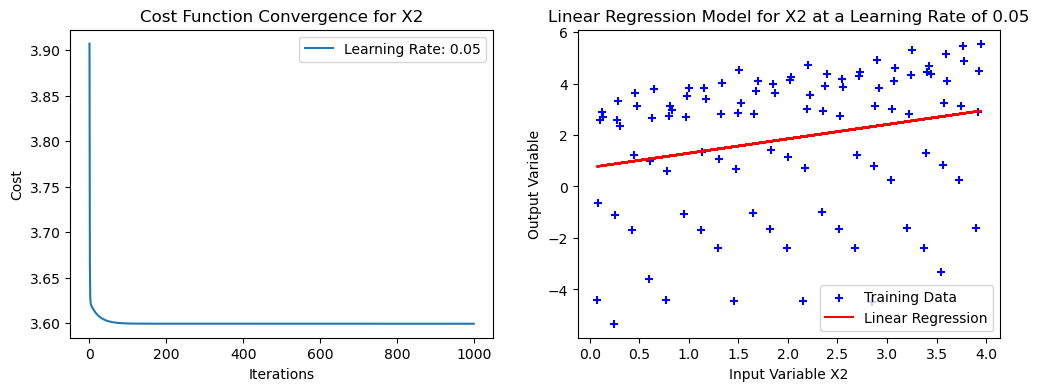

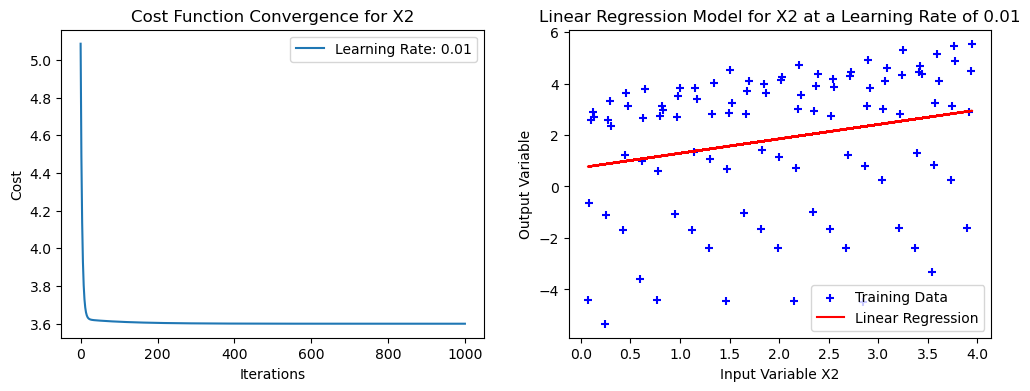

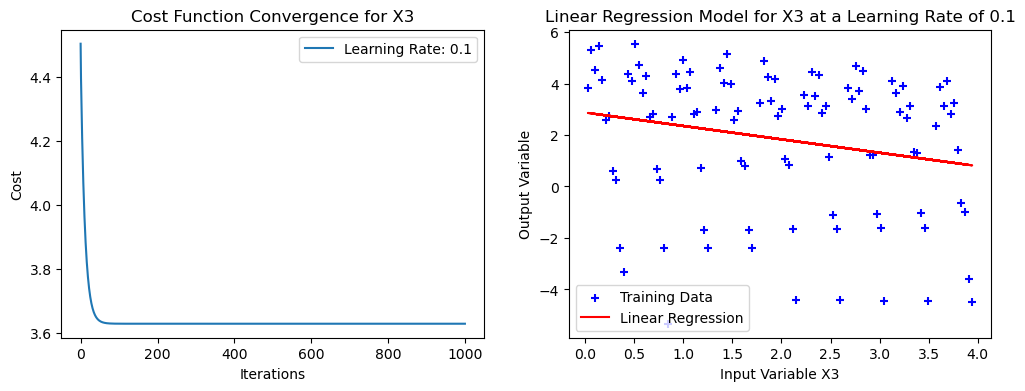

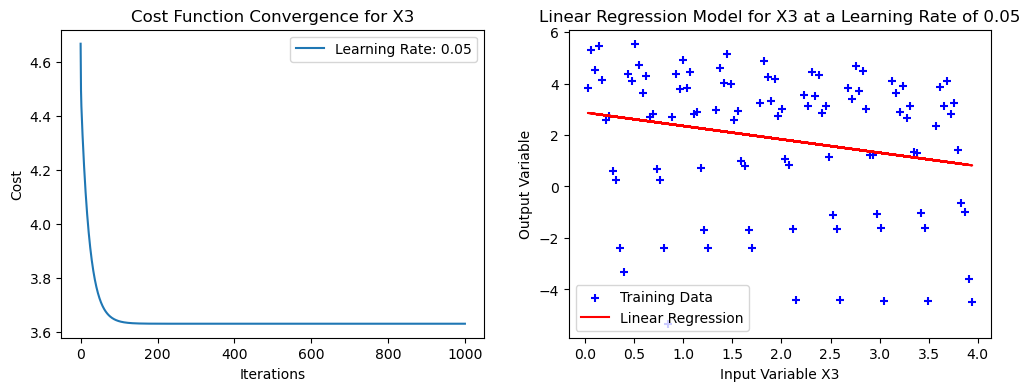

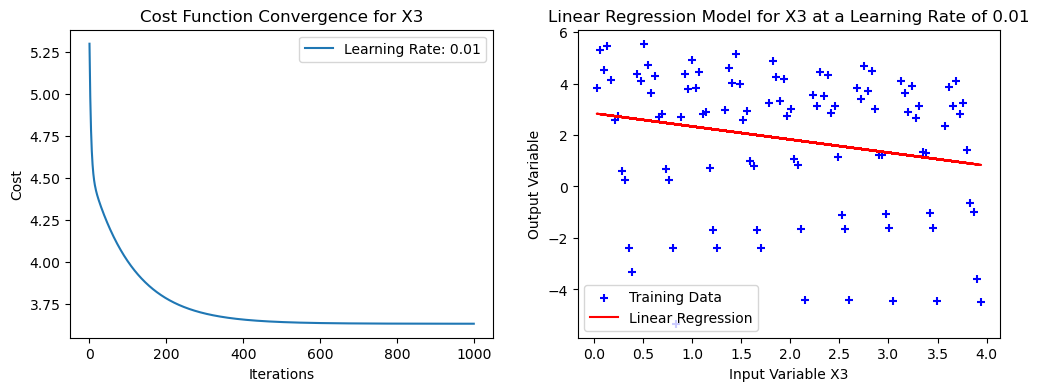

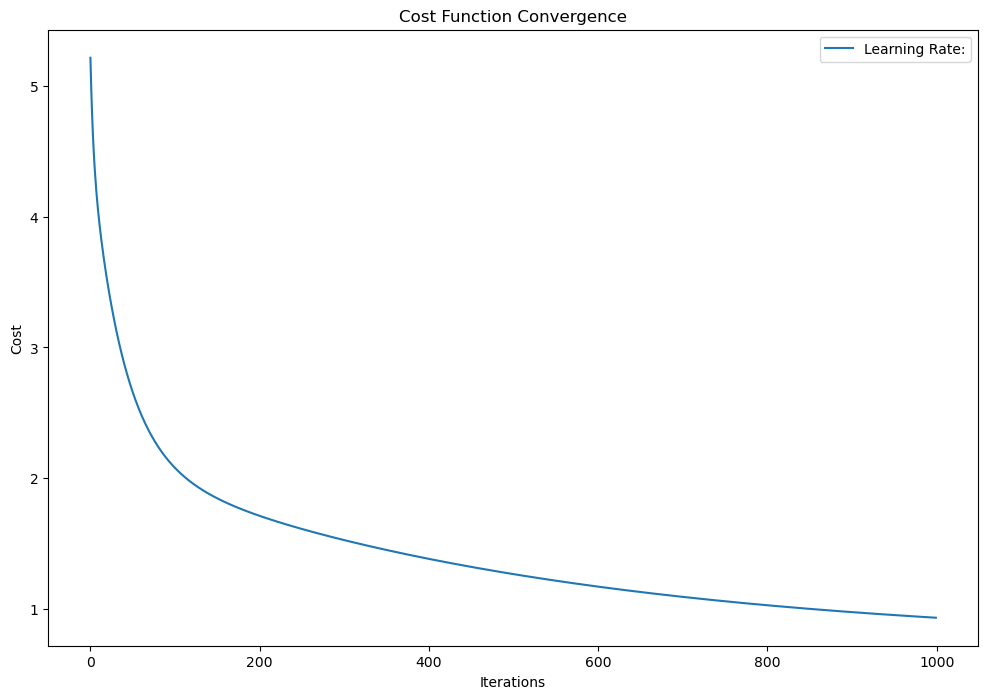

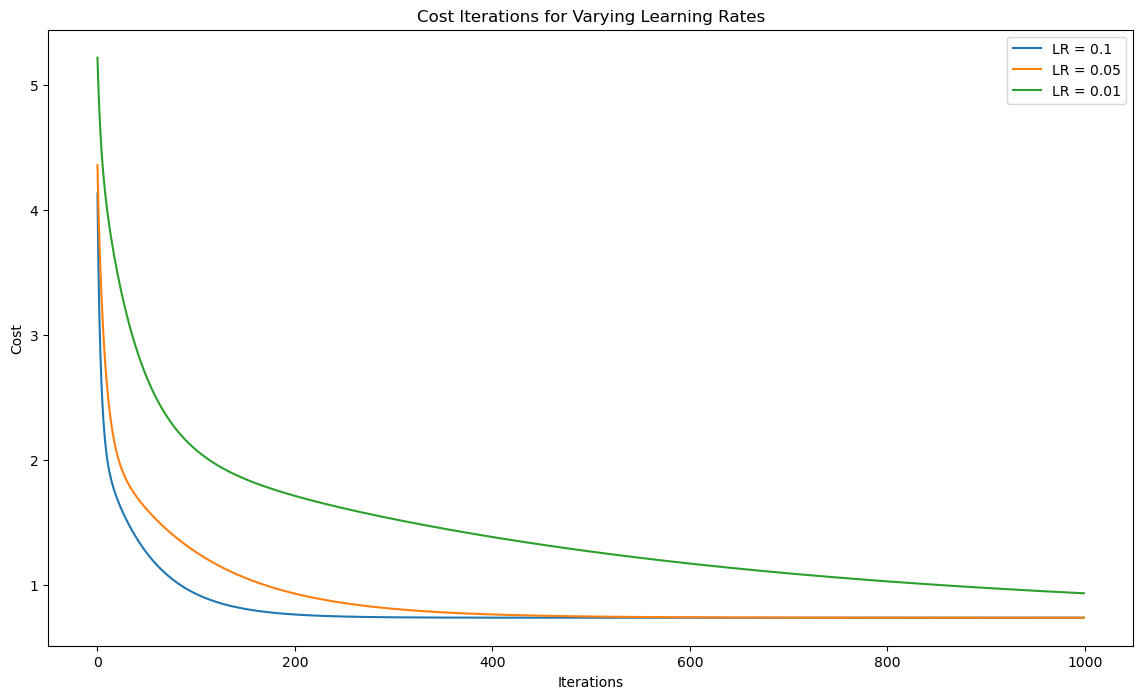

Learning rate 0.1: Final cost = 0.7384642444206544, Iterations taken = 1000
Learning rate 0.05: Final cost = 0.7385298570293828, Iterations taken = 1000
Learning rate 0.01: Final cost = 0.9337836009440804, Iterations taken = 1000


IndexError: invalid index to scalar variable.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/Users/benjaminslay/Downloads/HW1.csv')
print(df.head())
m = len(df)
X = df.iloc[:, :3].values  # explanatory variables
y = df.iloc[:, 3].values  # dependent variable

X_0 = np.ones((m, 1))
X_0[:5]

X_1 = X[:, 0].reshape(m, 1)
X_1[:5] 

X = np.hstack((X_0, X_1))
X[:5]

# Define the learning rates to explore
learning_rates = [0.1, 0.05, 0.01]

# Number of iterations for gradient descent
iterations = 1000

# Function to compute the cost
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    num_errors = np.subtract(predictions, y)
    sqr_errors = np.square(num_errors)
    cost = np.sum(sqr_errors) / (2*m)
    return cost

# Function to perform graident descent
def gradient_descent(X, y, learning_rate, iterations):
    m = len(y)
    theta = np.zeros(2)
    X_zer = np.c_[np.ones((m, 1)), X]
    cost_history = []

    for i in range(iterations):
        predictions = X_zer.dot(theta)
        errors = np.subtract(predictions, y)
        gradient = (2/m) * X_zer.T.dot(errors)
        sum_delta = learning_rate * gradient
        theta = theta - sum_delta
        cost_history.append(compute_cost(X_zer, y, theta))

    return theta, cost_history

models = {}
costs = []
# Train models with different explanatory variables
theta = np.zeros(2)
variables = df.columns[:-1]  # Assuming the last column is the target variable 'y'

for var in variables:
    X_i = df[[var]].values
    for alpha in learning_rates:
        # Executed gradient descent for each variable and learning rate
        theta, cost_history = gradient_descent(X_i, y, alpha, iterations)
        print(f'Model with {var}, learning rate {alpha}: theta_0 = {theta[0]:.4f}, theta_1 = {theta[1]:.4f}')

        plt.figure(figsize=(12, 4))
        # Plot the cost function convergence
        plt.subplot(1, 2, 1)
        plt.plot(range(iterations), cost_history, label=f'Learning Rate: {alpha}')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title(f'Cost Function Convergence for {var}')
        plt.legend()

        # Plot the linear regression model
        plt.subplot(1, 2, 2)
        plt.scatter(X_i, y, color='blue', marker='+', label = 'Training Data')
        plt.plot(X_i, theta[0] + theta[1] * X_i, color='r', label = 'Linear Regression')
        plt.xlabel(f'Input Variable {var}')
        plt.ylabel('Output Variable')
        plt.title(f'Linear Regression Model for {var} at a Learning Rate of {alpha}')
        plt.legend()

    costs.append((var, alpha, cost_history[-1]))
    models[(var, alpha)] = (theta, cost_history)


# Finding which explanatory variable has the lowest loss
costs.sort(key=lambda x: x[2])
lowest_variable, lowest_lr, lowest_loss = costs[0]
print(f'The explanatory variable {lowest_variable} with learning rate {lowest_lr} has the lowest cost: {lowest_loss:.4f}')

for var, lr, cost in costs:
    print(f'Variable: {var}, Learning Rate: {lr}, Final Loss: {cost:.4f}')


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/Users/benjaminslay/Downloads/HW1.csv')
print(df.head())
m = len(df)
X = df.iloc[:, :3].values  # explanatory variables
y = df.iloc[:, 3].values  # dependent variable

# Define the learning rate to explore
learning_rates = 0.05

# Number of iterations for gradient descent
iterations = 1000

def hypothesis(theta, X):
    return np.dot(X, theta)

# Define cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = hypothesis(theta, X)
    num_errors = np.subtract(predictions, y)
    sqr_errors = np.square(num_errors)
    cost = np.sum(sqr_errors) / (2*m)
    return cost

# Implement gradient descent
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        theta = theta - (alpha/m) * np.dot(X.T, (hypothesis(theta, X) - y))
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

theta = np.zeros(2)
theta_init = np.zeros(X.shape[1] + 1)
X_r = np.c_[np.ones((X.shape[0], 1)), X]
theta, cost_history = gradient_descent(X_r, y, theta_init, alpha, iterations)

# Plot cost function convergence
plt.figure(figsize=(12, 8))
plt.plot(range(iterations), cost_history, label=f'Learning Rate:')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title(f'Cost Function Convergence')
plt.legend()

# Print the final model and cost
print(f'Final linear model: Y = {theta[0]} + {theta[1]} * X1 + {theta[2]} * X2 + {theta[3]} * X3')
print(f'Final cost: {cost_history[-1]}')

# Define the learning rates to explore
learning_rates = [0.1, 0.05, 0.01]
theta_learning_rate = []
cost_learning_rate = []

for alpha in learning_rates:
    theta_lr, cost_lr = gradient_descent(X_r, y, theta_init.copy(), alpha, iterations)
    theta_learning_rate.append(theta_lr)
    cost_learning_rate.append(cost_lr)

# Plot cost over iterations for different learning rates
plt.figure(figsize=(14, 8))

for i, lr in enumerate(learning_rates):
    plt.plot(range(iterations), cost_learning_rate[i], label=f'LR = {lr}')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Iterations for Varying Learning Rates')
plt.legend()
plt.show()

for i, lr in enumerate(learning_rates):
    print(f"Learning rate {lr}: Final cost = {cost_learning_rate[i][-1]}, Iterations taken = {iterations}")

#Predicting New Values
new_values = np.array([
    [1, 1, 1],
    [2, 0, 4],
    [3, 2, 1]])
new_values_b = np.c_[np.ones((new_values.shape[0], 1)), new_values]
predictions = hypothesis(theta, new_values_b)

for i, new_val in enumerate(new_values):
    print(f"Prediction for {new_val}: {predictions[i][0]}")